<a href="https://colab.research.google.com/github/Sudharshansirikonda/AD/blob/main/Email_Marketing_Campaign_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
file_name = '/content/Email_Marketing_Campaign_Data.csv'

In [5]:
df = pd.read_csv(file_name)
df

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
0,58,1,2,1872.619118,2.394421,18,59.997401,1,0,0
1,47,3,3,1325.289574,2.840091,29,69.693176,1,0,1
2,43,2,1,2486.816106,8.424531,27,83.580196,1,1,0
3,25,2,0,783.298048,3.903043,0,103.905992,1,0,1
4,31,5,-1,1601.045636,3.183168,20,51.530231,0,0,0
...,...,...,...,...,...,...,...,...,...,...
100001,60,7,0,491.648352,5.656840,16,34.128312,0,0,1
100002,39,2,1,1756.649457,4.996649,12,75.056579,1,0,0
100003,31,2,0,1408.995621,9.231182,1,96.786007,1,0,0
100004,37,4,1,1274.000000,4.000000,48,57.600000,0,0,1


In [6]:
df.head()

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
0,58,1,2,1872.619118,2.394421,18,59.997401,1,0,0
1,47,3,3,1325.289574,2.840091,29,69.693176,1,0,1
2,43,2,1,2486.816106,8.424531,27,83.580196,1,1,0
3,25,2,0,783.298048,3.903043,0,103.905992,1,0,1
4,31,5,-1,1601.045636,3.183168,20,51.530231,0,0,0


In [7]:
df.describe()

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
count,100006.000000,100006.000000,100006.000000,100006.000000,100006.000000,100006.000000,100006.000000,100006.00000,100006.000000,100006.000000
mean,34.144971,4.154231,1.026968,1488.310525,4.905132,28.509609,69.560398,0.50166,0.500460,0.500180
std,9.953334,2.070700,1.087145,513.755838,2.007800,14.887600,15.642454,0.50000,0.500002,0.500002
min,-1.000000,-1.000000,-1.000000,-13.407589,-1.882086,-3.000000,24.382870,0.00000,0.000000,0.000000
25%,27.000000,3.000000,0.000000,1124.359983,3.584892,18.000000,58.714723,0.00000,0.000000,0.000000
50%,34.000000,4.000000,1.000000,1493.762060,4.987076,28.000000,69.072500,1.00000,1.000000,1.000000
75%,41.000000,6.000000,2.000000,1825.808988,6.294665,38.000000,80.410993,1.00000,1.000000,1.000000
max,75.000000,11.000000,5.000000,3170.173520,11.695316,78.000000,127.654607,1.00000,1.000000,1.000000


In [8]:
df.corr()

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
Customer_Age,1.000000,-0.042682,0.015455,-0.008564,-0.031286,-0.006336,-0.035751,0.008266,0.000374,-0.002635
Emails_Opened,-0.042682,1.000000,-0.003900,-0.049494,-0.002431,0.029583,-0.013296,0.003925,-0.002242,0.007844
Emails_Clicked,0.015455,-0.003900,1.000000,0.007288,0.023934,-0.003776,-0.024573,-0.002685,0.002507,0.003937
Purchase_History,-0.008564,-0.049494,0.007288,1.000000,0.024995,0.034611,0.013579,0.001915,0.004403,-0.002459
Time_Spent_On_Website,-0.031286,-0.002431,0.023934,0.024995,1.000000,-0.046828,-0.003565,-0.001164,0.003857,0.002387
Days_Since_Last_Open,-0.006336,0.029583,-0.003776,0.034611,-0.046828,1.000000,0.010476,0.001861,-0.001226,-0.000024
Customer_Engagement_Score,-0.035751,-0.013296,-0.024573,0.013579,-0.003565,0.010476,1.000000,-0.006988,-0.003117,-0.000238
Opened_Previous_Emails,0.008266,0.003925,-0.002685,0.001915,-0.001164,0.001861,-0.006988,1.000000,0.007497,-0.005541
Clicked_Previous_Emails,0.000374,-0.002242,0.002507,0.004403,0.003857,-0.001226,-0.003117,0.007497,1.000000,-0.004460
Device_Type,-0.002635,0.007844,0.003937,-0.002459,0.002387,-0.000024,-0.000238,-0.005541,-0.004460,1.000000


In [9]:
df.shape

(100006, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100006 entries, 0 to 100005
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Customer_Age               100006 non-null  int64  
 1   Emails_Opened              100006 non-null  int64  
 2   Emails_Clicked             100006 non-null  int64  
 3   Purchase_History           100006 non-null  float64
 4   Time_Spent_On_Website      100006 non-null  float64
 5   Days_Since_Last_Open       100006 non-null  int64  
 6   Customer_Engagement_Score  100006 non-null  float64
 7   Opened_Previous_Emails     100006 non-null  int64  
 8   Clicked_Previous_Emails    100006 non-null  int64  
 9   Device_Type                100006 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 7.6 MB


In [11]:
df.isnull().sum()

,0
Customer_Age,0
Emails_Opened,0
Emails_Clicked,0
Purchase_History,0
Time_Spent_On_Website,0
Days_Since_Last_Open,0
Customer_Engagement_Score,0
Opened_Previous_Emails,0
Clicked_Previous_Emails,0
Device_Type,0


In [12]:
duplicated = df.duplicated().sum()
duplicated

0

In [14]:
df["Emails_Clicked"] = df["Emails_Clicked"].apply(lambda x: max(x, 0))
df

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
0,58,1,2,1872.619118,2.394421,18,59.997401,1,0,0
1,47,3,3,1325.289574,2.840091,29,69.693176,1,0,1
2,43,2,1,2486.816106,8.424531,27,83.580196,1,1,0
3,25,2,0,783.298048,3.903043,0,103.905992,1,0,1
4,31,5,0,1601.045636,3.183168,20,51.530231,0,0,0
...,...,...,...,...,...,...,...,...,...,...
100001,60,7,0,491.648352,5.656840,16,34.128312,0,0,1
100002,39,2,1,1756.649457,4.996649,12,75.056579,1,0,0
100003,31,2,0,1408.995621,9.231182,1,96.786007,1,0,0
100004,37,4,1,1274.000000,4.000000,48,57.600000,0,0,1


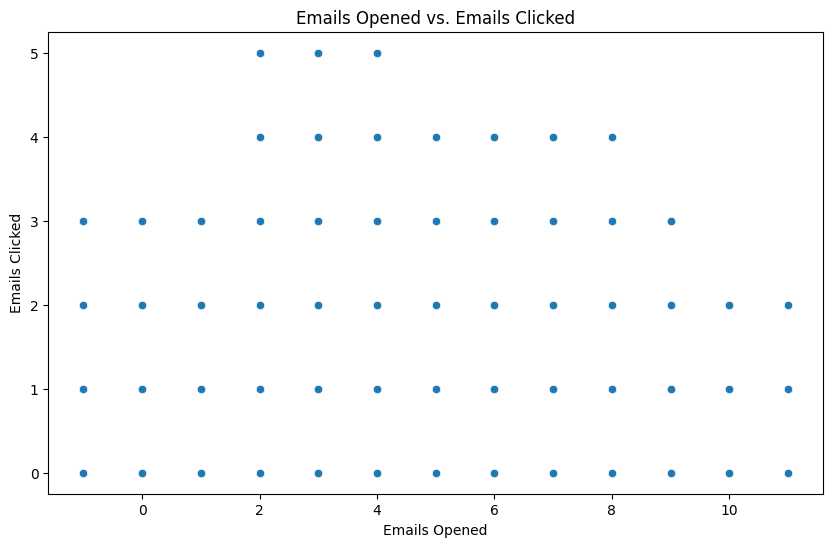

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Emails_Opened'], y=df['Emails_Clicked'])
plt.title('Emails Opened vs. Emails Clicked')
plt.xlabel('Emails Opened')
plt.ylabel('Emails Clicked')
plt.show()

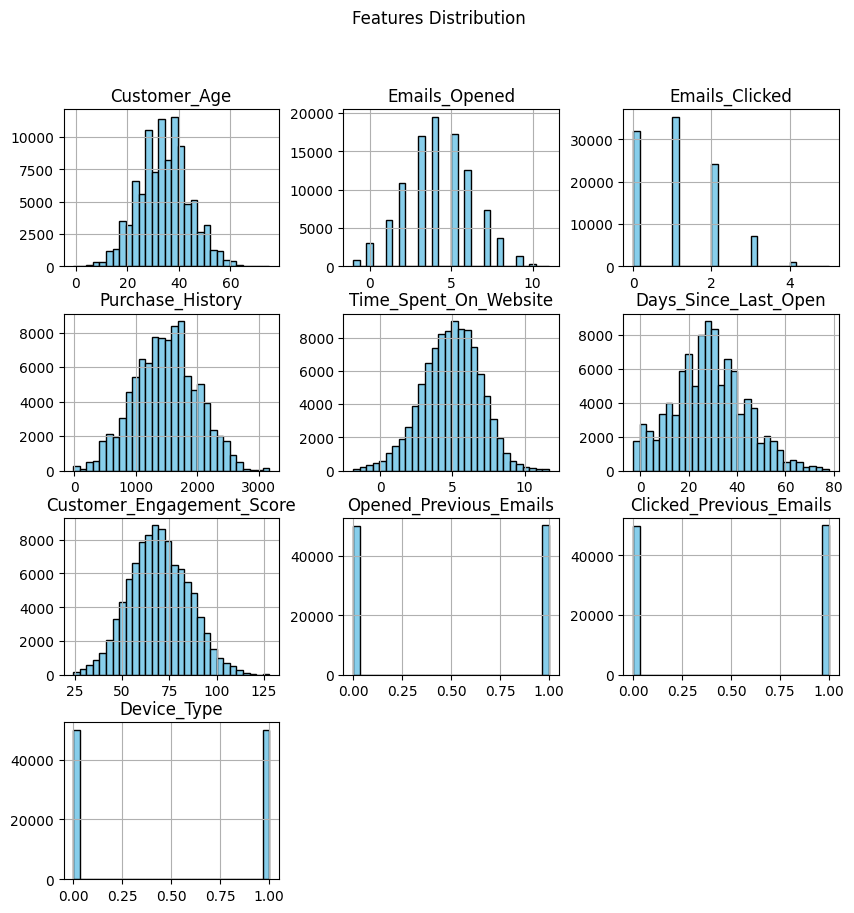

In [16]:
df.hist(figsize=(10,10),bins=30,color="skyblue",edgecolor="black")
plt.suptitle("Features Distribution")
plt.show()

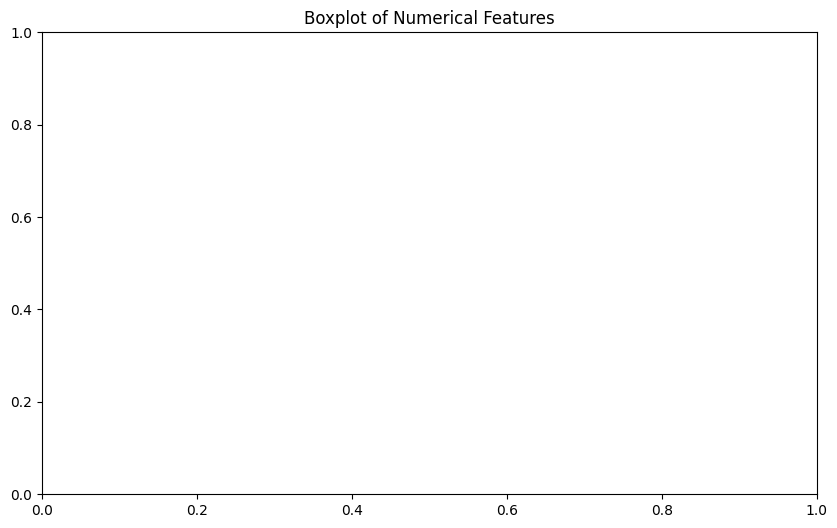

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(df=df[["Customer_Age", "Emails_Opened", "Emails_Clicked", "Purchase_History"]])
plt.title("Boxplot of Numerical Features")
plt.show()


In [18]:
X = df.drop(columns=["Opened_Previous_Emails"])
y = df["Opened_Previous_Emails"]


In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [20]:
X_train

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Clicked_Previous_Emails,Device_Type
47233,24,6,1,1997.971588,4.448630,37,86.736227,0,0
40008,21,2,0,1118.143003,5.323255,26,67.609862,1,1
99482,28,8,2,277.341342,3.660752,38,89.970576,1,0
81211,31,4,0,893.295369,5.467144,22,62.561697,1,1
72085,23,6,0,666.436897,4.918948,20,73.945530,0,1
...,...,...,...,...,...,...,...,...,...
6265,36,4,1,1467.059006,3.876564,24,61.395730,1,1
54886,38,7,0,1742.013420,5.073600,48,50.145914,0,1
76820,11,6,2,1279.402493,6.615640,36,85.432491,0,1
860,15,4,1,1142.021888,6.243786,37,47.843574,1,0


In [21]:
X_test

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Clicked_Previous_Emails,Device_Type
19090,34,7,0,812.592420,3.550703,33,82.308000,0,1
46342,52,4,1,551.177631,7.187321,50,71.509645,1,1
18455,16,4,1,1806.156984,2.009362,15,48.038494,0,0
35756,35,8,2,2124.655028,3.538409,6,79.850627,0,0
79349,44,6,0,2092.018419,2.913440,40,95.262528,1,1
...,...,...,...,...,...,...,...,...,...
72456,21,6,1,2064.181923,2.334449,41,65.440374,1,1
27665,46,4,1,1959.204837,5.990375,23,69.093689,0,1
23192,18,6,1,2178.115241,4.529723,33,79.922482,1,0
98552,31,4,3,1345.806858,4.348212,41,60.318377,0,0


In [22]:
y_train

,Opened_Previous_Emails
47233,0
40008,1
99482,0
81211,0
72085,0
...,...
6265,1
54886,1
76820,0
860,1


In [23]:
y_test

,Opened_Previous_Emails
19090,0
46342,0
18455,0
35756,0
79349,0
...,...
72456,0
27665,1
23192,1
98552,0


In [24]:
from sklearn.preprocessing import StandardScaler
num_features = ["Customer_Age", "Emails_Opened", "Emails_Clicked", "Purchase_History",
                "Time_Spent_On_Website", "Days_Since_Last_Open", "Customer_Engagement_Score"]

scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

X_train.head()


,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Clicked_Previous_Emails,Device_Type
47233,-1.018652,0.892682,-0.102921,0.993909,-0.227982,0.570585,1.096218,0,0
40008,-1.319793,-1.037759,-1.127951,-0.719133,0.207055,-0.167029,-0.124580,1,1
99482,-0.617131,1.857902,0.922110,-2.356188,-0.619871,0.637641,1.302660,1,0
81211,-0.315990,-0.072539,-1.127951,-1.156915,0.278625,-0.435253,-0.446794,1,1
72085,-1.119032,0.892682,-1.127951,-1.598612,0.005953,-0.569364,0.279813,0,1
